# 🔥 Part 13: Seaborn Correlation, Heatmaps & Pair Plots (Mapping from Matplotlib)

**Goal:** Learn to visualize relationships and correlation matrices using Seaborn's powerful, high-level tools like `sns.heatmap` and `sns.pairplot`.

---

### Key Learning Objectives
1.  Calculate a **correlation matrix** using `df.corr()` (this is a Pandas function and stays the same).
2.  Use **`sns.scatterplot()`** as a high-level replacement for `plt.scatter()`.
3.  Use **`sns.barplot()`** to replace `plt.barh()`, and learn to add text annotations.
4.  Use **`sns.heatmap()`** to create a professional, annotated correlation matrix, replacing the `plt.imshow()` + `for` loop combination.
5.  Introduce **`sns.pairplot()`** for visualizing multi-dimensional relationships at a glance.

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib # Keep for version checking if desired

# Set a Seaborn theme for all plots
sns.set_theme(style="whitegrid") 

print("🎯 LAB 13.1: ENVIRONMENT SETUP")
print("✅ Seaborn, Matplotlib, and pandas imported successfully!")

# Load simple Titanic data
titanic_df = pd.DataFrame({
    'Age': [22, 38, 26, 35, 54, 2, 27, 14, 58, 20, 39, 55, 31, 25, 40, 66, 28, 42, 21, 18],
    'Fare': [7.25, 71.28, 7.92, 53.10, 51.86, 21.08, 11.13, 30.07, 26.55, 8.05, 31.0, 16.0, 26.0, 7.90, 227.52, 10.5, 26.0, 13.0, 7.74, 7.05],
    'Pclass': [3, 1, 3, 1, 1, 3, 3, 2, 1, 3, 1, 1, 2, 3, 1, 2, 2, 3, 3, 3],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1]
})

# Drop rows with missing values for this analysis
titanic_df = titanic_df.dropna(subset=['Age'])

print("✅ Titanic data loaded and cleaned.")

🎯 LAB 13.1: ENVIRONMENT SETUP
✅ Seaborn, Matplotlib, and pandas imported successfully!
✅ Titanic data loaded and cleaned.


## 1. Understanding Correlation (with `sns.scatterplot`)

Calculating the correlation coefficient is a Pandas operation, so `df['Age'].corr(df['Fare'])` remains the same.

We will replace Matplotlib's `plt.scatter()` with Seaborn's `sns.scatterplot()`. It integrates directly with DataFrames and the Seaborn theme.

🎯 LAB 13.1: Understanding Correlation

Correlation between Age and Fare: 0.19


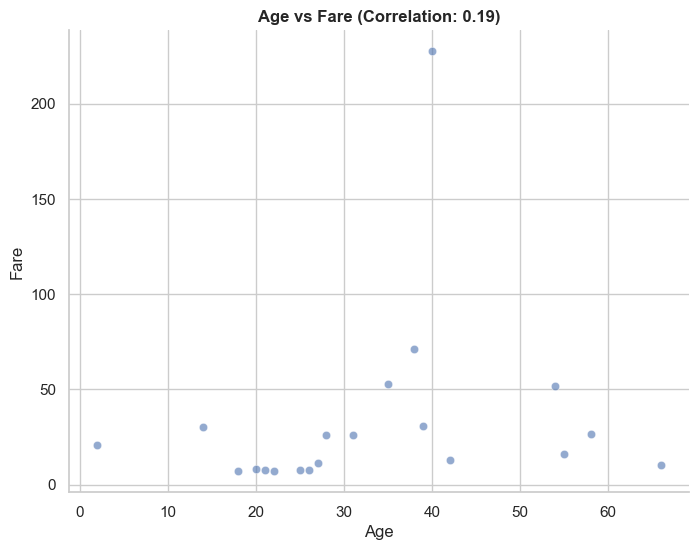


📚 What does correlation mean?
• +1.0 = Perfect positive (both increase together)
• 0.0 = No relationship
• -1.0 = Perfect negative (one up, other down)

✅ Lab 1 Complete!


In [15]:
print("🎯 LAB 13.1: Understanding Correlation\n")

# Calculate correlation between Age and Fare (Pandas function)
correlation = titanic_df['Age'].corr(titanic_df['Fare'])
print(f"Correlation between Age and Fare: {correlation:.2f}")

# Visualize with sns.scatterplot
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=titanic_df, x='Age', y='Fare', alpha=0.6)

# We still use Matplotlib methods to customize the Axes
ax.set_title(f'Age vs Fare (Correlation: {correlation:.2f})', fontweight='bold')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
# The grid is now handled by sns.set_theme()

sns.despine() # Remove top and right spines
plt.show()

print("\n📚 What does correlation mean?")
print("• +1.0 = Perfect positive (both increase together)")
print("• 0.0 = No relationship")
print("• -1.0 = Perfect negative (one up, other down)")

print("\n✅ Lab 1 Complete!")

## 2. Correlation Matrix & Bar Plots (`sns.barplot`)

Calculating the `.corr()` matrix is still a Pandas function.

We can replace the `plt.barh()` from your Lab 3 with `sns.barplot()`. Note that Seaborn's bar plots are vertical by default. To fix the warning you pointed out, we will assign the categorical variable (`'Feature'`) to **both `x` and `hue`**, and then set `legend=False`.

🎯 LAB 13.2 & 13.3: Correlation Matrix & Bar Plot

Correlation Matrix:
           Age  Fare  Pclass  Survived
Age       1.00  0.19   -0.65     -0.34
Fare      0.19  1.00   -0.53      0.28
Pclass   -0.65 -0.53    1.00     -0.00
Survived -0.34  0.28   -0.00      1.00


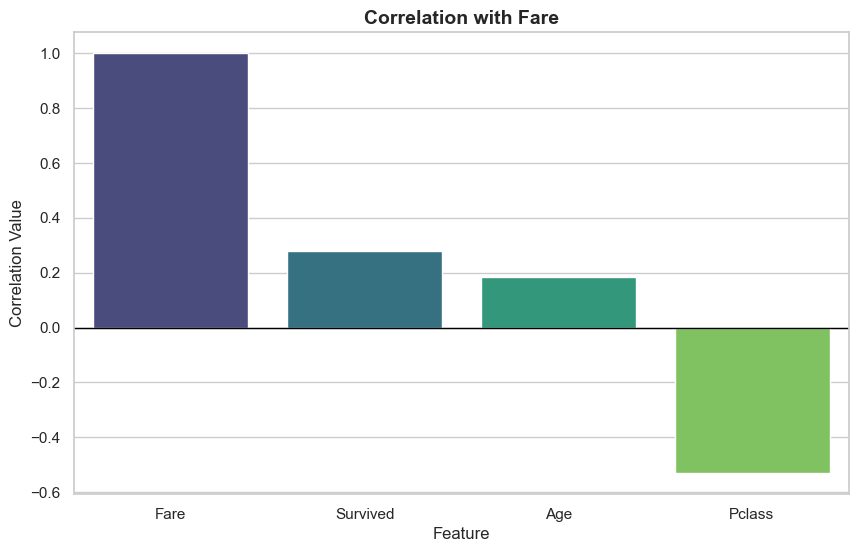


✅ Lab 2 & 3 Complete!


In [16]:
print("🎯 LAB 13.2 & 13.3: Correlation Matrix & Bar Plot\n")

# Select only numeric columns
numeric_data = titanic_df[['Age', 'Fare', 'Pclass', 'Survived']]

# Calculate correlation matrix
corr_matrix = numeric_data.corr(numeric_only=True)
print("Correlation Matrix:")
print(corr_matrix.round(2))

# Look at all correlations with Fare
# We reset_index() so we can use the column names in Seaborn
fare_correlations = corr_matrix['Fare'].sort_values(ascending=False).reset_index()
fare_correlations = fare_correlations.rename(columns={'index': 'Feature', 'Fare': 'Correlation'})

# Visualize
plt.figure(figsize=(10, 6))
# Use sns.barplot (vertical)
ax = sns.barplot(
    data=fare_correlations, 
    x='Feature', 
    y='Correlation',
    hue='Feature', # <-- FIX: Assign x-variable to hue
    palette='viridis',
    legend=False # <-- FIX: Disable the legend
)
ax.set_title('Correlation with Fare', fontweight='bold', fontsize=14)
ax.set_xlabel('Feature')
ax.set_ylabel('Correlation Value')
ax.axhline(0, color='black', linewidth=1) # Use axhline for a horizontal line at 0

plt.show()

print("\n✅ Lab 2 & 3 Complete!")

## 3. Finding Survival Predictors (Annotated Bar Plot)

This is a great example of combining Seaborn's plotting with Matplotlib's annotation.
- We use `sns.barplot()` to easily create the horizontal plot.
- **FIX for FutureWarning:** We assign the y-axis variable (`survival_corr.index`) to **both `y` and `hue`**, and set `legend=False`.
- We re-use the *same* `for` loop from your Matplotlib script to add the text labels, as `ax.text()` is a Matplotlib function.

🎯 LAB 13.4: Finding Survival Predictors

Feature correlations with Survival:
Fare      0.28
Pclass   -0.00
Age      -0.34
Name: Survived, dtype: float64


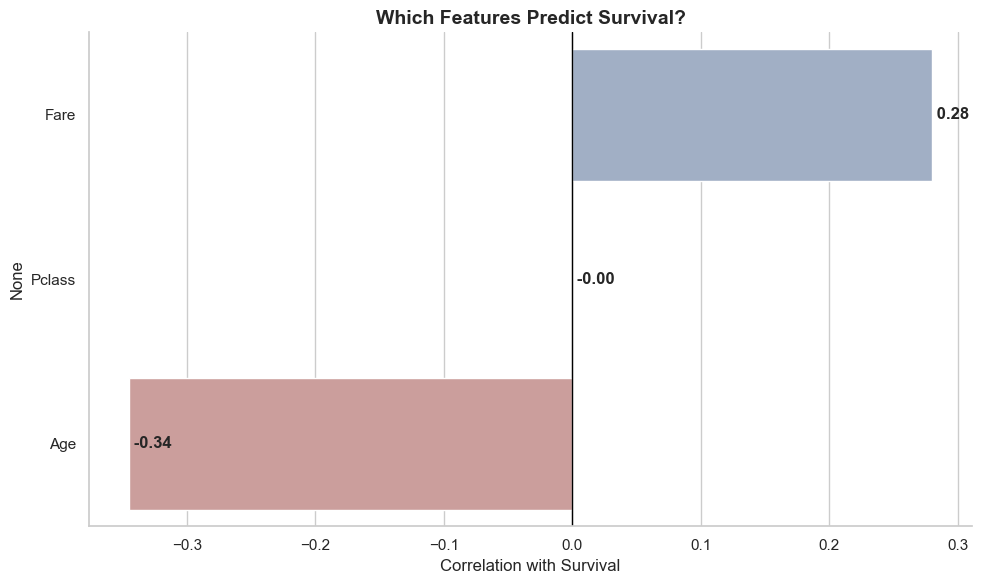


💡 What this means:
• Best predictor: Fare (0.28)
  → Higher Fare = Better survival chance

✅ Lab 4 Complete!


In [17]:
print("🎯 LAB 13.4: Finding Survival Predictors\n")

# Get correlations with Survived
survival_corr = corr_matrix['Survived'].drop('Survived').sort_values(ascending=False)

print("Feature correlations with Survival:")
print(survival_corr.round(2))

# Visualize
plt.figure(figsize=(10, 6))
# Plot with sns.barplot (horizontally by switching x and y)
ax = sns.barplot(
    x=survival_corr.values, 
    y=survival_corr.index, 
    hue=survival_corr.index, # <-- FIX: Assign y-variable to hue
    palette='vlag', # A good diverging palette (blue/red)
    orient='h', # Specify horizontal orientation
    legend=False # <-- FIX: Disable the legend
)
ax.set_title('Which Features Predict Survival?', fontweight='bold', fontsize=14)
ax.set_xlabel('Correlation with Survival')
ax.axvline(0, color='black', linewidth=1) # Vertical line at 0

# Add labels (this Matplotlib loop works perfectly on the Seaborn plot)
for i, (feature, val) in enumerate(survival_corr.items()):
    ax.text(val, i, f' {val:.2f}', # Add text at (x=val, y=i)
            va='center', # Vertically center
            fontweight='bold')

sns.despine() # Remove top/right spines
plt.tight_layout()
plt.show()

print("\n💡 What this means:")
print(f"• Best predictor: {survival_corr.index[0]} ({survival_corr.iloc[0]:.2f})")
if survival_corr.iloc[0] > 0:
    print(f"  → Higher {survival_corr.index[0]} = Better survival chance")

print("\n✅ Lab 4 Complete!")

## 4. PRACTICE PROJECT: Correlation Matrix Heatmap (The Seaborn Advantage)

This is the key lesson. In your Matplotlib script (Lab 5), you had to:
1.  Use `plt.imshow()` to draw the colored squares.
2.  Manually set all the `xticks` and `yticks`.
3.  Manually add a `plt.colorbar()`.
4.  Write a complex **nested `for` loop** to add `plt.text()` for each cell.

In Seaborn, you do all of this with **one command**: `sns.heatmap()`.
* `annot=True`: Adds the numbers automatically (replaces the loop).
* `fmt='.2f'`: Formats the numbers.
* `cmap='coolwarm'`: Sets the color map.
* `vmin=-1, vmax=1`: Centers the color bar.
* Seaborn automatically uses the DataFrame's index/columns for labels.

🎯 PRACTICE PROJECT: Correlation Summary (Heatmap)



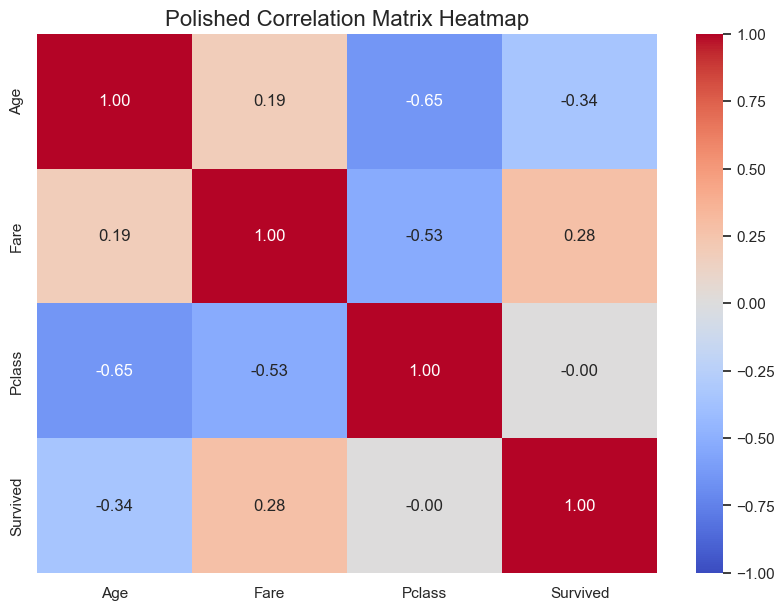


✅ This one command replaces ~15 lines of Matplotlib code.


In [18]:
print("🎯 PRACTICE PROJECT: Correlation Summary (Heatmap)\n")

plt.figure(figsize=(10, 7))

# This one function replaces all the Matplotlib code from Lab 5, Plot 1
ax = sns.heatmap(
    corr_matrix,
    annot=True,      # This one command replaces the entire 'for' loop
    fmt='.2f',       # Format the annotations
    cmap='coolwarm', # Use a diverging palette (red=neg, blue=pos)
    vmin=-1,         # Set the min value of the color bar to -1
    vmax=1           # Set the max value of the color bar to +1
)

ax.set_title('Polished Correlation Matrix Heatmap', fontsize=16)
plt.show()

print("\n✅ This one command replaces ~15 lines of Matplotlib code.")

## 5. Bonus Lab: `sns.pairplot()` - The Best Correlation Tool

A heatmap only shows *linear* correlation numbers. To see the *actual shape* of relationships (linear, non-linear, or no relationship), we use `sns.pairplot()`.

This single function creates a grid of scatterplots for every numerical variable against every other, with histograms (or KDEs) on the diagonal. This is the **best** first step in any multi-dimensional analysis.

🎯 LAB 13.6: The `sns.pairplot`



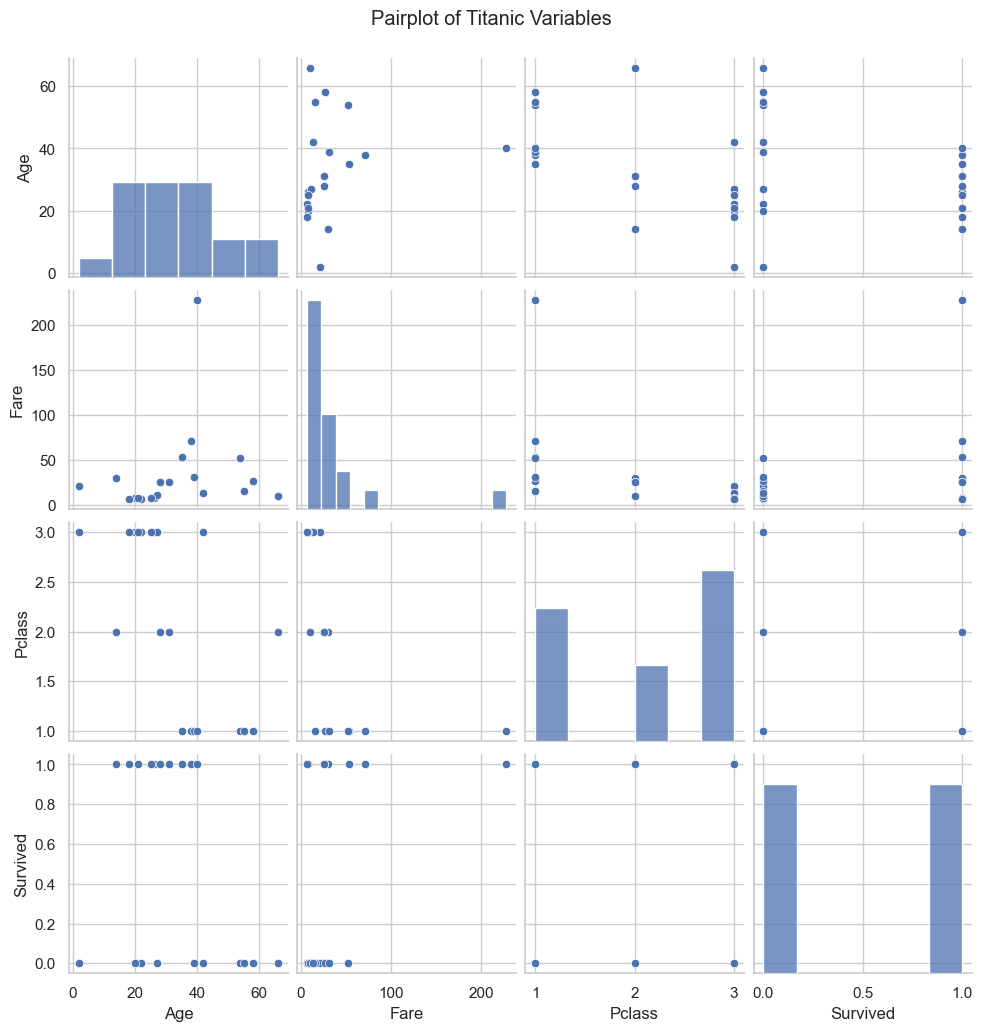

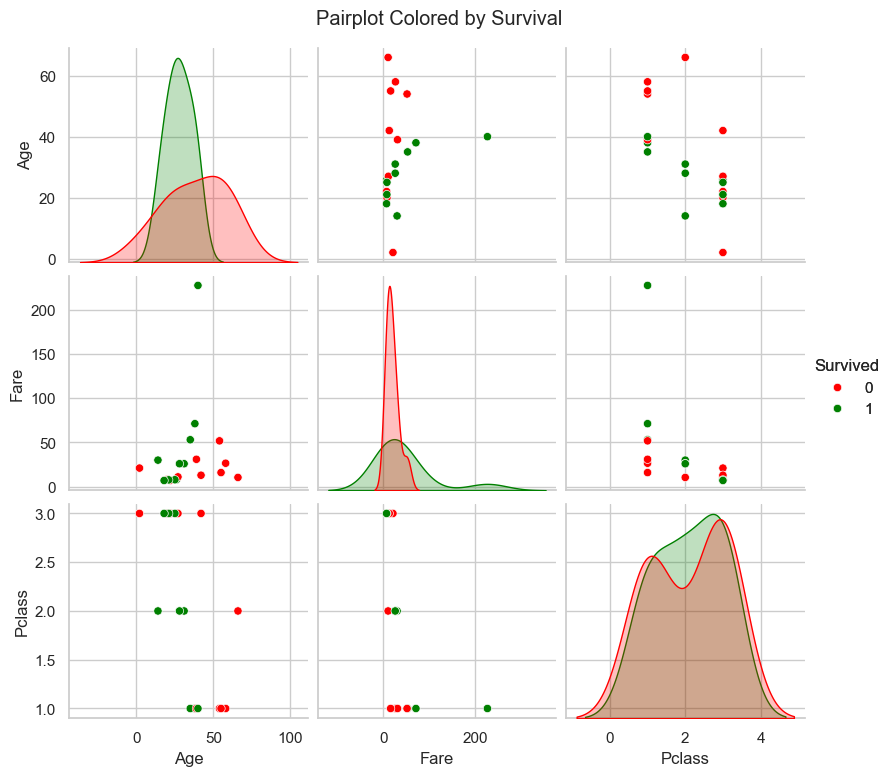

In [19]:
print("🎯 LAB 13.6: The `sns.pairplot`\n")

# 1. Basic Pairplot
# This replaces the need to manually make many scatter plots
g = sns.pairplot(
    data=titanic_df, 
    vars=['Age', 'Fare', 'Pclass', 'Survived']
)
g.fig.suptitle("Pairplot of Titanic Variables", y=1.03)
plt.show()


# 2. Advanced Pairplot with `hue`
# We can add a categorical dimension (like 'Survived') to color the plots
g = sns.pairplot(
    data=titanic_df, 
    vars=['Age', 'Fare', 'Pclass'],
    hue='Survived', # Color the points by survival status
    palette={0:'red', 1:'green'}
)
g.fig.suptitle("Pairplot Colored by Survival", y=1.03)
g.add_legend()
plt.show()

## 6. Final Project: Rebuilding the Dashboard (Seaborn Style)

Let's rebuild the 2x2 dashboard from your file. We'll use `plt.subplots()` to create the grid, and then plot Seaborn's "Axes-level" functions onto each `ax`.

This shows how to integrate Seaborn's powerful plots into a custom Matplotlib layout.

🎯 LAB 13.7: FINAL PROJECT - Seaborn Dashboard

💾 Dashboard saved as 'seaborn_part13_correlation_dashboard.png'


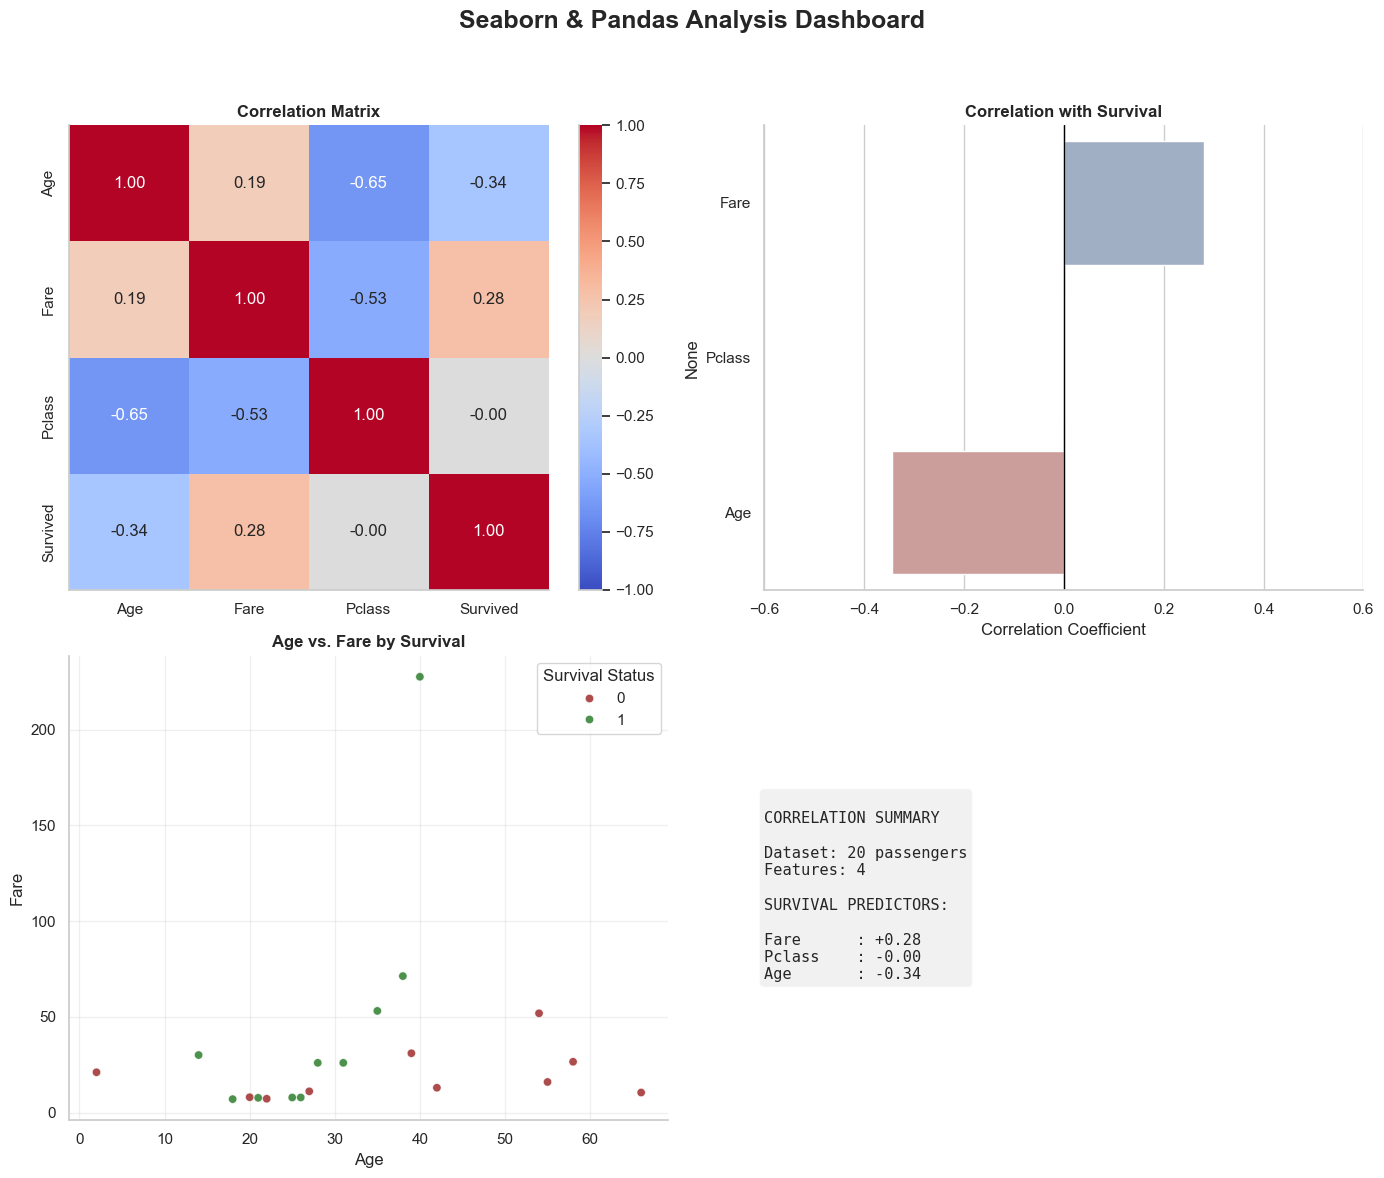


🎉 Part 13 complete!


In [20]:
print("🎯 LAB 13.7: FINAL PROJECT - Seaborn Dashboard\n")

# 1. Get the data for the bar plot
corr_matrix = numeric_data.corr(numeric_only=True)
survival_corr = corr_matrix['Survived'].drop('Survived').sort_values(ascending=False)

# 2. Create the 2x2 Figure and Axes grid
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Seaborn & Pandas Analysis Dashboard', fontsize=18, fontweight='bold')

# 3. Plot 1 (Top-Left): Correlation Heatmap
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm',
    vmin=-1, vmax=1,
    ax=axes[0, 0] # Tell heatmap to draw on axes[0, 0]
)
axes[0, 0].set_title('Correlation Matrix', fontweight='bold')

# 4. Plot 2 (Top-Right): Survival Correlation Bar Plot
# (Using the horizontal bar plot from Lab 4)
# FIX: Added hue=survival_corr.index and legend=False
sns.barplot(
    x=survival_corr.values, 
    y=survival_corr.index, 
    hue=survival_corr.index, 
    palette='vlag',
    ax=axes[0, 1], # Draw on axes[0, 1]
    legend=False 
)
axes[0, 1].set_title('Correlation with Survival', fontweight='bold')
axes[0, 1].set_xlabel('Correlation Coefficient')
axes[0, 1].axvline(0, color='black', linewidth=1)
axes[0, 1].set_xlim(-0.6, 0.6)

# 5. Plot 3 (Bottom-Left): Age vs. Fare Scatterplot
# We add `hue='Survived'` for a more informative plot
sns.scatterplot(
    data=titanic_df, 
    x='Age', 
    y='Fare', 
    hue='Survived',
    palette={0:'darkred', 1:'darkgreen'},
    alpha=0.7,
    ax=axes[1, 0] # Draw on axes[1, 0]
)
axes[1, 0].set_title('Age vs. Fare by Survival', fontweight='bold')
axes[1, 0].get_legend().set_title('Survival Status')
axes[1, 0].grid(True, alpha=0.3)

# 6. Plot 4 (Bottom-Right): Summary Text
# This Matplotlib code is unchanged
axes[1, 1].axis('off') # Turn off the axis lines
summary = f"""
CORRELATION SUMMARY

Dataset: {len(titanic_df)} passengers
Features: {len(corr_matrix.columns)}

SURVIVAL PREDICTORS:
"""
for feature, val in survival_corr.items():
    summary += f"\n{feature:10}: {val:+.2f}"

axes[1, 1].text(0.0, 0.5, summary,
               fontsize=11, fontfamily='monospace',
               verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))


# 7. Final Touches
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust for suptitle
sns.despine() # Remove spines from plots that have them

# 8. Save and Show
fig.savefig('seaborn_part13_correlation_dashboard.png', dpi=300)
print("💾 Dashboard saved as 'seaborn_part13_correlation_dashboard.png'")

plt.show()

print("\n🎉 Part 13 complete!")